In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


### EDA

In [2]:
df.shape

(90189, 5)

In [4]:
df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [5]:
# A/B 테스트로 사용된 버전별로 유저들은 몇명씩 있는지 체크
df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


<AxesSubplot:ylabel='sum_gamerounds'>

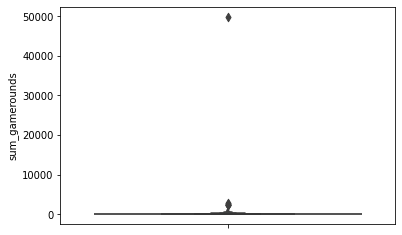

In [7]:
# 유저 플레이 라운드 수를 시각화 해서 보자
sns.boxenplot(data=df, y='sum_gamerounds')

In [9]:
# 아웃 라이어 체크 후 제거
df[df['sum_gamerounds'] > 45000]

,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,False,True


In [11]:
# 아웃라이어 제거
df = df[df['sum_gamerounds'] < 45000]
print(df.shape)

(90188, 5)


In [13]:
# 상위 50% 유저들의 플레이 횟수 체크
df['sum_gamerounds'].describe()

count    90188.000000
mean        51.320253
std        102.682719
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max       2961.000000
Name: sum_gamerounds, dtype: float64

<AxesSubplot:ylabel='sum_gamerounds'>

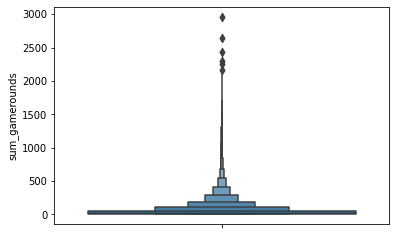

In [14]:
# 다시 시각화로 체크
sns.boxenplot(data=df, y='sum_gamerounds')

### 데이터 분석

In [20]:
# 각 게임실행횟수 별 유저의 수를 카운트 해봅니다
plot_df = df.groupby('sum_gamerounds')['userid'].count() # 게임라운드를 유저 아이디 별로 그룹화
plot_df

sum_gamerounds
0       3994
1       5538
2       4606
3       3958
4       3629
        ... 
2251       1
2294       1
2438       1
2640       1
2961       1
Name: userid, Length: 941, dtype: int64

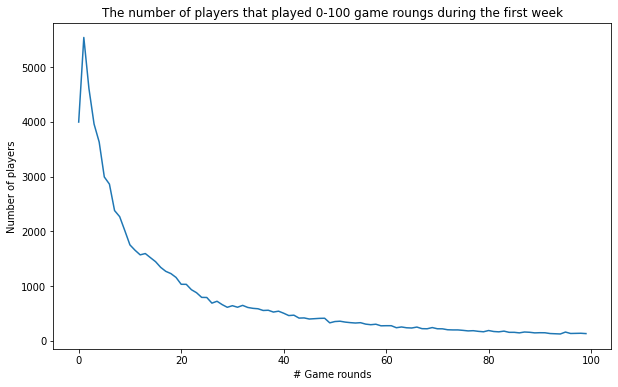

In [19]:
# 시각화로 파악
ax = plot_df[:100].plot(figsize=(10,6))
ax.set_title('The number of players that played 0-100 game roungs during the first week')
ax.set_ylabel('Number of players')
ax.set_xlabel('# Game rounds');

C:\devtools\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


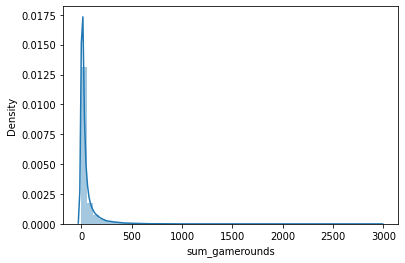

In [22]:
sns.distplot(df['sum_gamerounds']);

In [23]:
# 1-day retention 평균
df['retention_1'].mean() #True/False로 나뉘기때문에 0,1로 구분

0.4452144409455803

In [24]:
# 그룹에 따른 1-day retention 비교
df.groupby('version')['retention_1'].mean() #그룹을 버전으로 묶으면서 버전마다 retention_1의 평균을 가져옴

version
gate_30    0.448198
gate_40    0.442283
Name: retention_1, dtype: float64

In [25]:
# 7-day retention도 확인
df['retention_7'].mean()

0.1860557945624695

In [26]:
# 그룹에 따른 1-day retention 비교
df.groupby('version')['retention_7'].mean() #그룹을 버전으로 묶으면서 버전마다 retention_1의 평균을 가져옴

version
gate_30    0.190183
gate_40    0.182000
Name: retention_7, dtype: float64

### 데이터 검증

<AxesSubplot:ylabel='Density'>

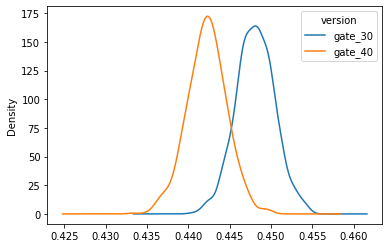

In [27]:
# 각각의 AB그룹에 대해 bootstrap된 means 값의 리스트를 만듬
# 하나씩 뽑아서 mean값을 넣어주는 행위
boot_1d =[]
for i in range(1000):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    
# 받은 리스트를 DF로 변환
boot_1d = pd.DataFrame(boot_1d)

# 부트스트랩 분포에 대한 Kernel Density Estimate plot
boot_1d.plot(kind='density');



In [33]:
boot_1d.gate_30

retention_1    0.448320
retention_1    0.450339
retention_1    0.448512
retention_1    0.444795
retention_1    0.450476
                 ...   
retention_1    0.449771
retention_1    0.447318
retention_1    0.451824
retention_1    0.450237
retention_1    0.452551
Name: gate_30, Length: 1000, dtype: float64

In [34]:
boot_1d.gate_40

retention_1    0.441050
retention_1    0.444667
retention_1    0.441035
retention_1    0.442116
retention_1    0.444547
                 ...   
retention_1    0.435806
retention_1    0.444159
retention_1    0.440898
retention_1    0.440484
retention_1    0.443405
Name: gate_40, Length: 1000, dtype: float64

In [32]:
boot_1d.gate_30 - boot_1d.gate_40

retention_1    0.007270
retention_1    0.005673
retention_1    0.007477
retention_1    0.002679
retention_1    0.005929
                 ...   
retention_1    0.013965
retention_1    0.003158
retention_1    0.010926
retention_1    0.009753
retention_1    0.009145
Length: 1000, dtype: float64

In [54]:
(boot_1d.gate_30 - boot_1d.gate_40)/boot_1d.gate_30 * 100

retention_1    1.621521
retention_1    1.259615
retention_1    1.666992
retention_1    0.602407
retention_1    1.316193
                 ...   
retention_1    3.104870
retention_1    0.706084
retention_1    2.418129
retention_1    2.166244
retention_1    2.020868
Length: 1000, dtype: float64

In [55]:
(boot_1d.gate_30 - boot_1d.gate_40)/boot_1d.gate_40 * 100

retention_1    1.648248
retention_1    1.275683
retention_1    1.695252
retention_1    0.606057
retention_1    1.333748
                 ...   
retention_1    3.204361
retention_1    0.711105
retention_1    2.478052
retention_1    2.214209
retention_1    2.062550
Length: 1000, dtype: float64

게이트가 레벨 30에 잠길 때 1-day retention이 클 확률: 0.958


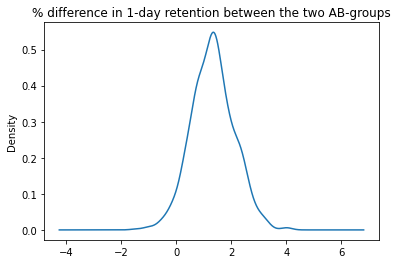

In [39]:
# 두 AB 그룹간의 %차이 평균 컬럼을 추가
boot_1d['diff'] = (boot_1d.gate_30 - boot_1d.gate_40)/boot_1d.gate_40 * 100

# %차이를 시각화
ax = boot_1d['diff'].plot(kind='density')
ax.set_title('% difference in 1-day retention between the two AB-groups')

# 게이트가 30에 잠길때 1-day retention이 클 확률 계산
print('게이트가 레벨 30에 잠길 때 1-day retention이 클 확률:',(boot_1d['diff'] > 0).mean())

In [41]:
# 7일 비율 확인
df.groupby('version')['retention_7'].sum() / df.groupby('version')['retention_7'].count()

version
gate_30    0.190183
gate_40    0.182000
Name: retention_7, dtype: float64

In [42]:
df.groupby('version')['retention_7'].sum() # True/False 이기에 default는 True를 샘

version
gate_30    8501
gate_40    8279
Name: retention_7, dtype: int64

In [43]:
df.groupby('version')['retention_7'].count()

version
gate_30    44699
gate_40    45489
Name: retention_7, dtype: int64

In [47]:
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [49]:
df1 =pd.DataFrame({'Rating':[True,True,False,True,False]})

In [51]:
df1.sum()

Rating    3
dtype: int64

게이트가 레벨 30에 잠길 때 7-day retention이 클 확률: 1.0


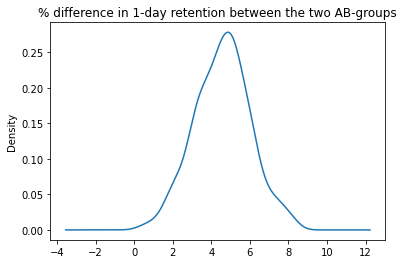

In [52]:
# 7일 RETENTION 부트스트랩
# 각각의 AB그룹에 대해 bootstrap된 means 값의 리스트를 만듬
# 하나씩 뽑아서 mean값을 넣어주는 행위
boot_7d =[]
for i in range(500):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)
    
# 받은 리스트를 DF로 변환
boot_7d = pd.DataFrame(boot_7d)

# 두 AB 그룹간의 %차이 평균 컬럼을 추가
boot_7d['diff'] = (boot_7d.gate_30 - boot_7d.gate_40)/boot_7d.gate_40 * 100

# %차이를 시각화
ax = boot_7d['diff'].plot(kind='density')
ax.set_title('% difference in 1-day retention between the two AB-groups')

# 게이트가 30에 잠길때 7-day retention이 클 확률 계산
print('게이트가 레벨 30에 잠길 때 7-day retention이 클 확률:',(boot_7d['diff'] > 0).mean())



### 통계적 비교

In [61]:
df_30 = df[df['version'] == 'gate_30']
print(df_30.shape)
df_30.tail()

(44699, 5)


,userid,version,sum_gamerounds,retention_1,retention_7
90179,9998576,gate_30,14,True,False
90180,9998623,gate_30,7,False,False
90182,9999178,gate_30,21,True,False
90183,9999349,gate_30,10,False,False
90186,9999710,gate_30,28,True,False


In [62]:
df_40 = df[df['version']=='gate_40']
print(df_40.shape)
df_40.tail()

(45489, 5)


,userid,version,sum_gamerounds,retention_1,retention_7
90181,9998733,gate_40,10,True,False
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90187,9999768,gate_40,51,True,False
90188,9999861,gate_40,16,False,False


In [64]:
# t-test 진행
from scipy import stats

tTestResult = stats.ttest_ind(df_30['retention_1'], df_40['retention_1'])
tTestResultDiffVar = stats.ttest_ind(df_30['retention_1'], df_40['retention_1'], equal_var=False)

tTestResult

Ttest_indResult(statistic=1.7871153372992439, pvalue=0.07392220630182522)

In [65]:
# t-test 진행
from scipy import stats

tTestResult = stats.ttest_ind(df_30['retention_7'], df_40['retention_7'])
tTestResultDiffVar = stats.ttest_ind(df_30['retention_7'], df_40['retention_7'], equal_var=False)

tTestResult

Ttest_indResult(statistic=3.1575495965685936, pvalue=0.0015915357297854773)

### 범주형 데이터 검증 - Chi-square

In [66]:
# 카이제곱검정을 위한 분할표 생성
# 버전별로 생존자의 수 합계를 구함
df.groupby('version').sum()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,222937707836,2294941,20034,8501
gate_40,227857702576,2333530,20119,8279


In [67]:
# 버전별 전체 유저의 수
df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44699,44699,44699,44699
gate_40,45489,45489,45489,45489


### 버전 별 분할표를 만들어봅니다. 
||retention_1=False|retention_1=True|
|------|---|---|
|version=gate30|(44699-20034)|20034|
| version=gate40|(45489-20119)|20119|



||retention_7=False|retention_7=True|
|------|---|---|
|version=gate30|(44699-8501)|8501|
| version=gate40|(45489-8279)|8279|



In [69]:
# 버전별 분할표
import scipy as sp
obs1 = np.array([[20119, (45489-20119)], [20034, (44699-20034)]])
sp.stats.chi2_contingency(obs1)

(3.1698355431707994,
 0.07500999897705699,
 1,
 array([[20252.35970417, 25236.64029583],
        [19900.64029583, 24798.35970417]]))

In [70]:
obs7 = np.array([[8501, (44699-8501)], [8279, (45489-8279)]])
sp.stats.chi2_contingency(obs7)

(9.915275528905669,
 0.0016391259678654423,
 1,
 array([[ 8316.50796115, 36382.49203885],
        [ 8463.49203885, 37025.50796115]]))